### Purpose

The purpose of this notebook is to explore the **[Stanford Extra](https://paperswithcode.com/paper/who-left-the-dogs-out-3d-animal)** dataset.
The ultimate aim is to use it for fine-tuning a general purpose pose estimation model.

#### Import dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

#### Define paths

In [9]:
dataset_path = './dataset'
annotation_filepath = 'Annotations/StanfordExtra_v1.json'


### Explore The Dataset

In [11]:
f = open(os.path.join(dataset_path, annotation_filepath))
data = json.load(f)
f.close()

##### What is the format of the annotation?

In [93]:
type(data)

list

In [94]:
type(data[0])

dict

In [19]:
data[0].keys()

dict_keys(['img_path', 'img_width', 'img_height', 'joints', 'img_bbox', 'is_multiple_dogs', 'seg'])

All annotations are gathered in a list, and an annotation item is a dictionary

#### Exploring a data item (image + annotation)

In [23]:
nb_data_items = len(data)
rd_item = np.random.choice(np.arange(nb_data_items))

In [35]:
data_sample = data[rd_item]

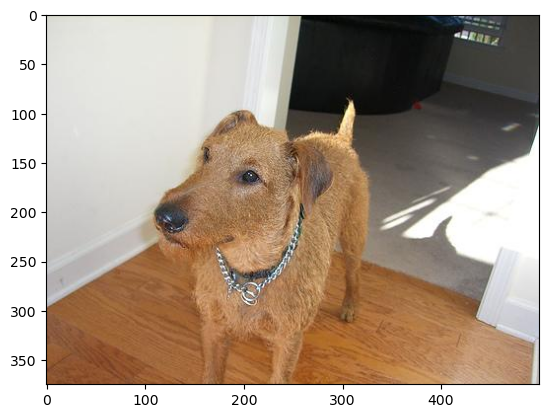

In [36]:
# load image
image_path = os.path.join(dataset_path, 'Images', data_sample['img_path'])
image = cv2.imread(image_path)[:, :, ::-1]
plt.imshow(image)

In [54]:
image.shape, image.dtype

((375, 500, 3), dtype('uint8'))

In [90]:
# remove invalid joints (a joint that has 0 as the third component should be removed because it is not "seen" in the image, 
# this is a convention proper to this dataset
joints = np.array(data_sample['joints'])
joints = joints[ joints[:, -1] == 1.0 ][:, :2]

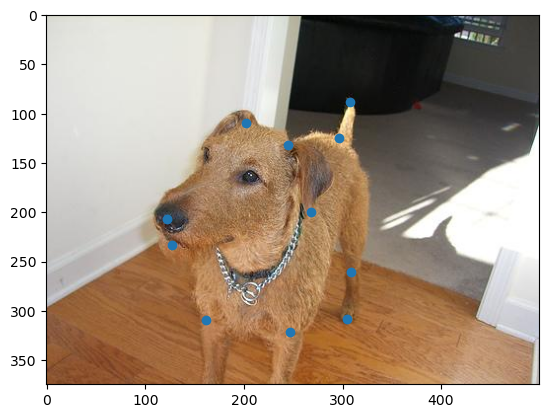

In [92]:
plt.imshow(image)
plt.scatter(joints[:, 0], joints[:, 1])

In [72]:
image.shape

(375, 500, 3)

In [107]:
# refactor in a proper function 
# the variable that stores the annotations (i.e the variable "data") is not passed to the function below
def explore_data(nb_samples: int) -> None:
    samples = np.random.choice(data, size=nb_samples, replace=False)
    fig, axes = plt.subplots(nb_samples // 3 +1, 3)
    
    # for each sample
    for idx , sample in enumerate(samples):
        
        # load the image
        image_path = os.path.join(dataset_path, 'Images', sample['img_path'])
        image = cv2.imread(image_path)[:, :, ::-1] #BGR->RGB
        
        # extract the pose
        joints = np.array(sample['joints'])
        joints = joints[ joints[:, -1] == 1.0 ][:, :2]

        row = idx // 3
        column = idx % 3
        axes[row, column].imshow(image)
        axes[row, column].scatter(joints[:, 0], joints[:, 1])

    # Adjust layout to prevent overlap
    # plt.tight_layout()
    plt.show()

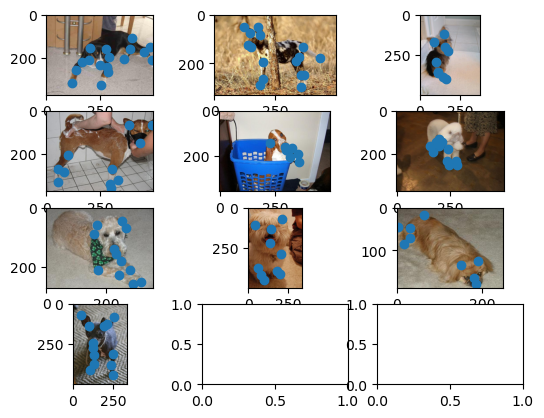

In [109]:
explore_data(10)